In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim

## Loading the data

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

## Creating Neural Network Using sequential

In [4]:
model_seq = nn.Sequential(  nn.Linear(784, 128),
                        nn.ReLU(),
                        nn.Linear(128, 64),
                        nn.ReLU(),
                        nn.Linear(64,10),
                        nn.LogSoftmax(dim=1))

## Creating Custom Neural Network as Class

In [5]:
class My_Network(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.L1 = nn.Linear(784, 128)
        self.L2 = nn.Linear(128, 64)
        self.L3 = nn.Linear(64, 10)
    
    def forward(self, input):
        output = F.relu(self.L1(input))
        output = F.relu(self.L2(output))
        output = F.log_softmax(self.L3(output), dim=1)

        return output

In [6]:
model_class = My_Network()

## Let's Train the both network and see the result's

In [7]:
criterion_seq = nn.NLLLoss()
criterion_class = nn.NLLLoss()

optimizer_seq = optim.SGD(model_seq.parameters(), lr=.003)
optimizer_class = optim.SGD(model_class.parameters(), lr=.003)


### I will train the both models in the same loop to view the difference

In [8]:
epochs = 15

for e in range(epochs):
    running_loss_seq = 0
    running_loss_class = 0
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)


        # Sequential model training
        optimizer_seq.zero_grad()

        output = model_seq(images)
        loss_seq =criterion_seq(output, labels)
        
        loss_seq.backward()
        optimizer_seq.step()
        
        running_loss_seq += loss_seq.item()   
        
        
        
        
        # Class model training
        optimizer_class.zero_grad()
        print(images[0].shape)
        output = model_class.forward(images)
        loss_class = criterion_class(output, labels)
        
        loss_class.backward()
        optimizer_class.step()
        
        running_loss_class += loss_class.item()   

        
    else:
        print(f"Loss for epoch {e + 1} Seq: {running_loss_seq / len(trainloader):.4f}  Class: {running_loss_class / len(trainloader):.4 f}")


torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size

KeyboardInterrupt: 

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import helper

def predict_and_plot(img, model):
    img = img.view(1, 784)
    with torch.no_grad():
        logits = model.forward(img)
    
    ps = F.softmax(logits, dim=1)
    helper.view_classify(img.view(1,28,28), ps)

e:\Coding\Udacity_DEEP\intro-to-pytorch\helper.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)


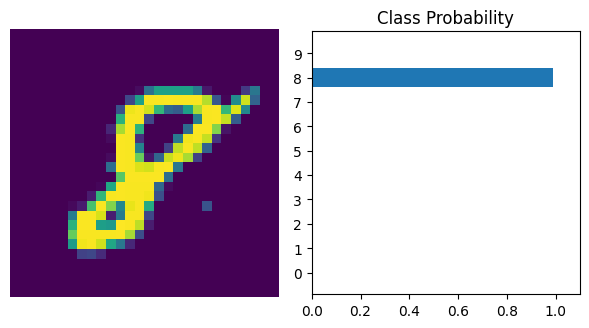

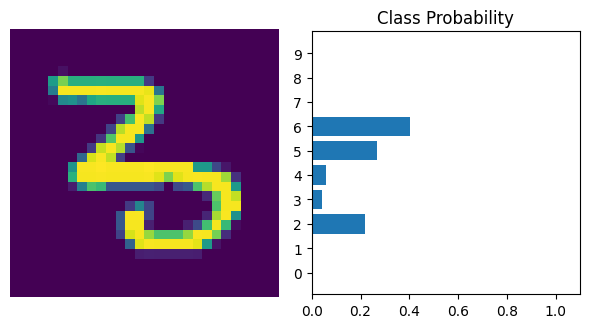

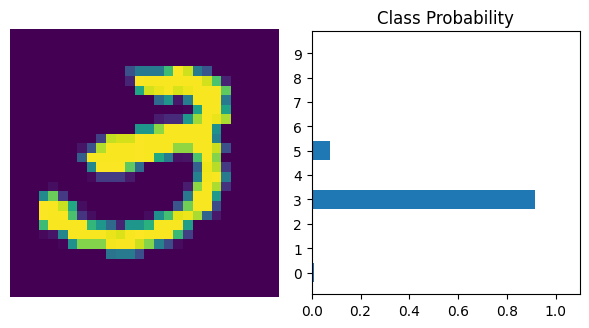

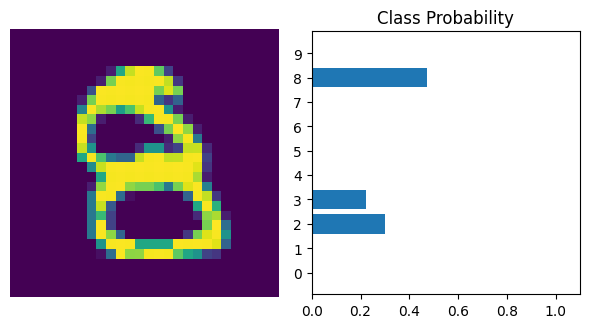

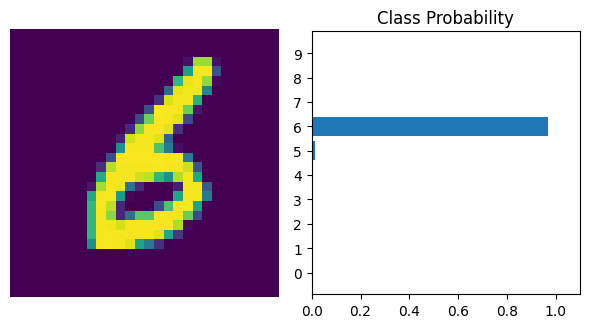

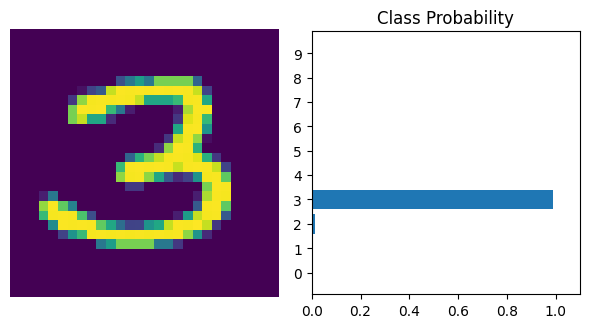

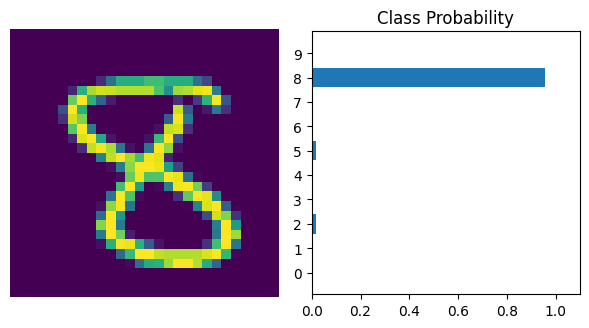

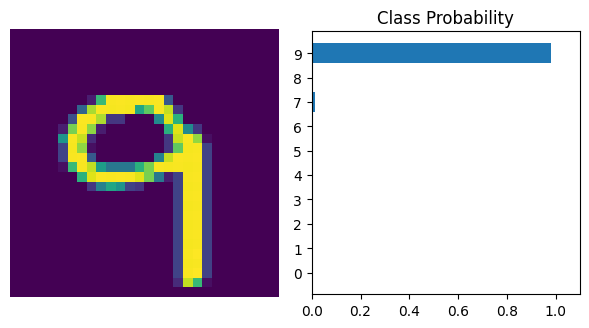

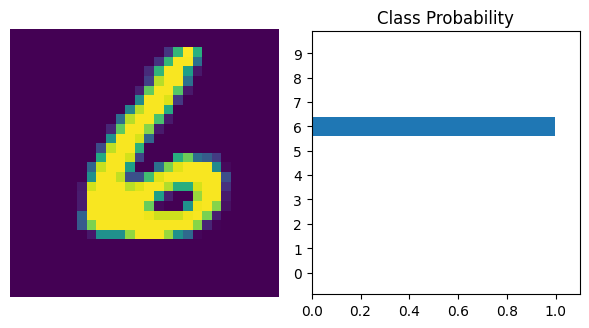

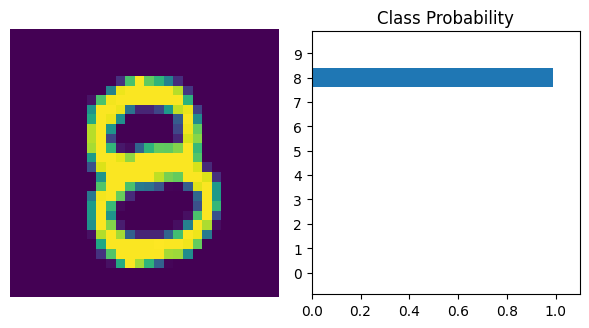

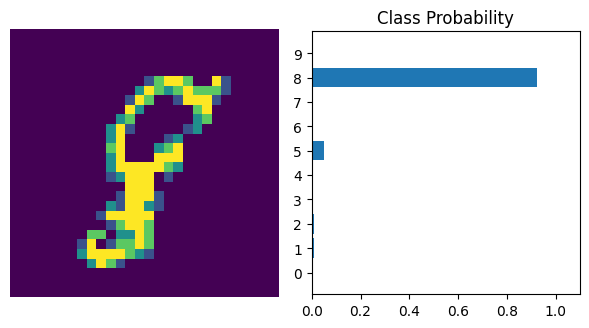

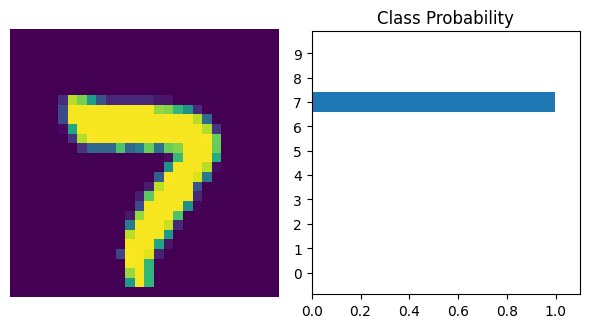

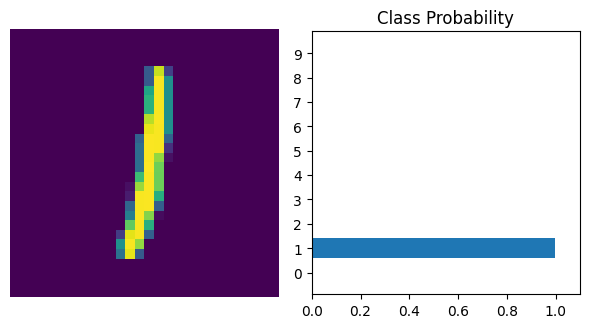

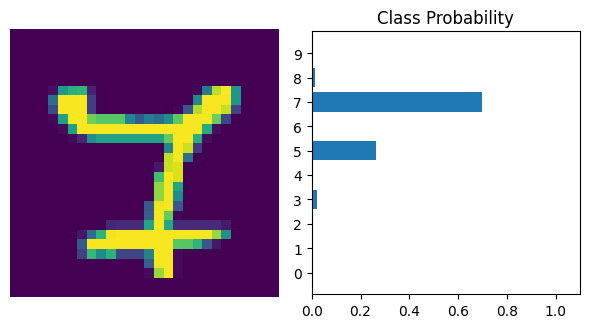

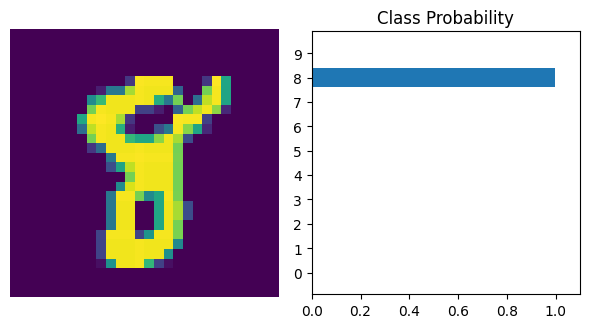

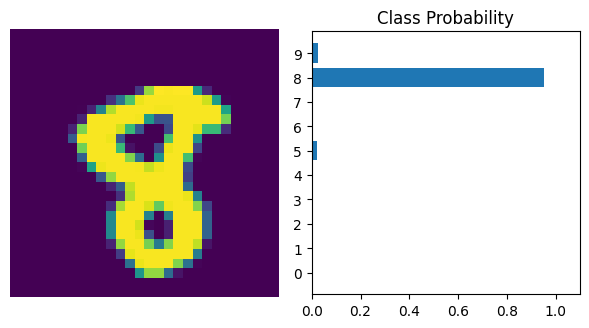

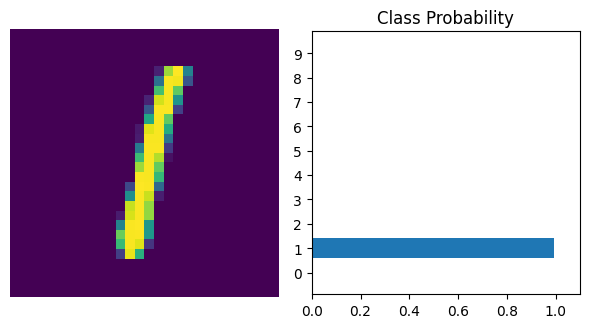

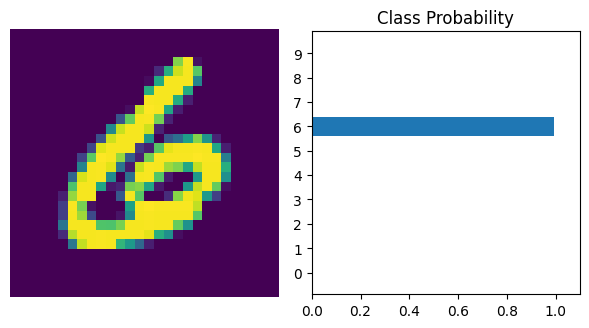

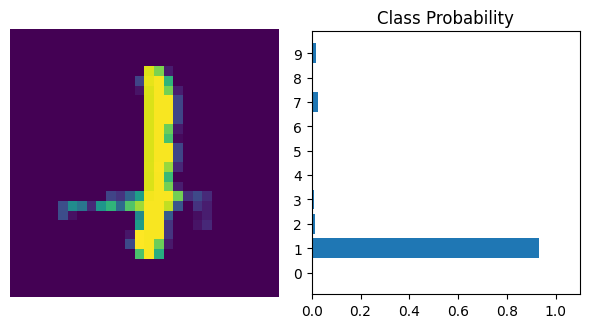

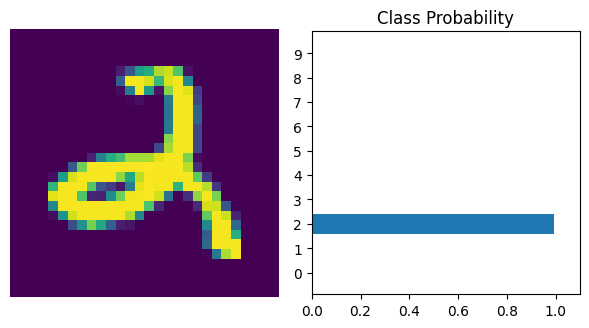

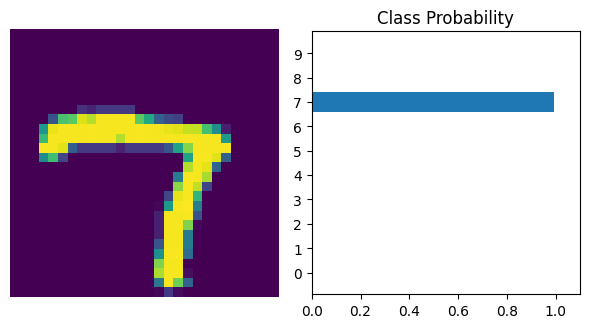

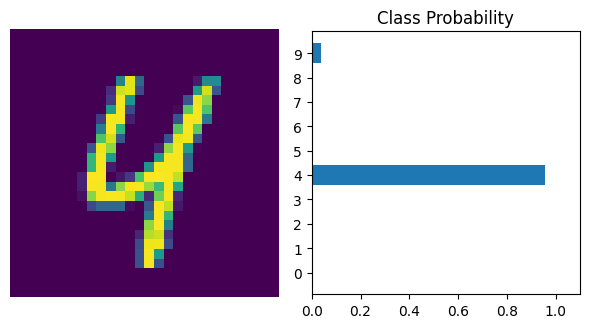

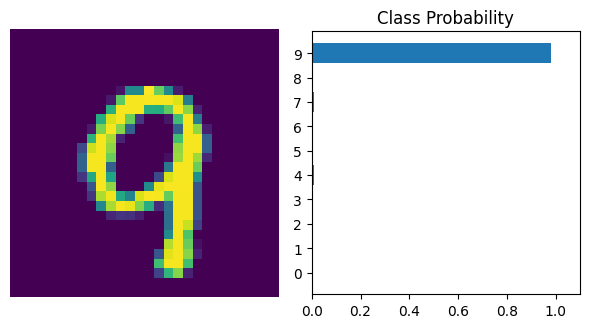

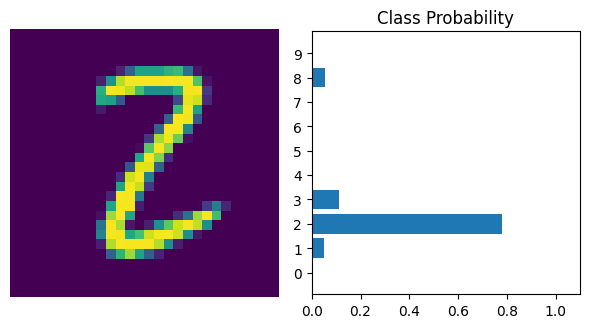

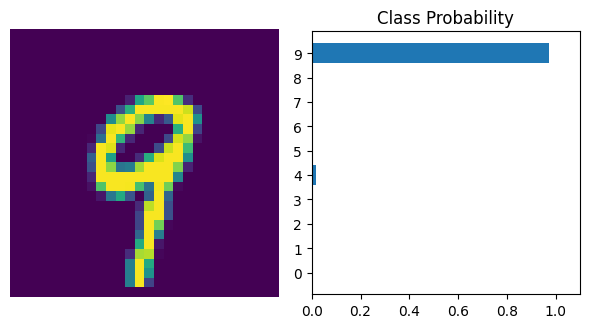

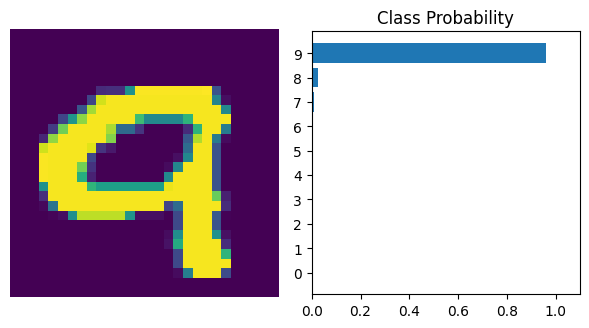

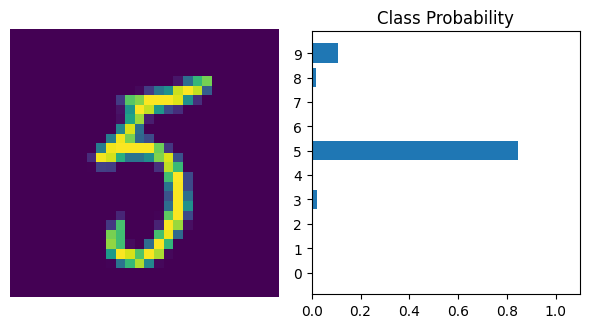

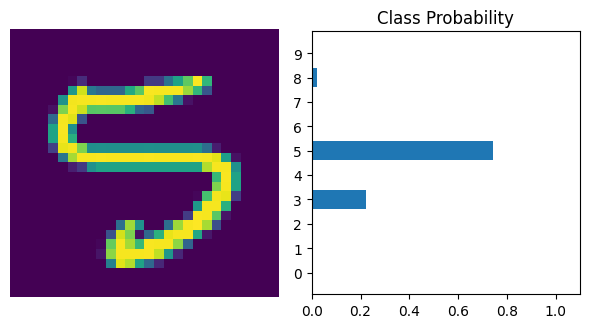

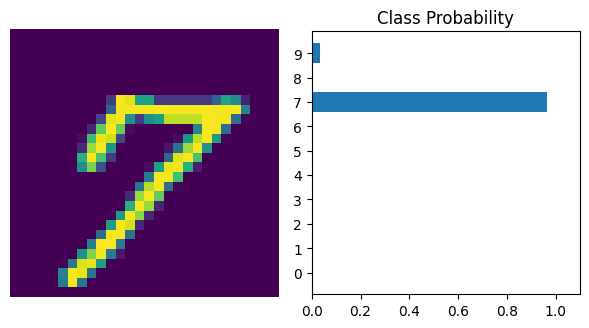

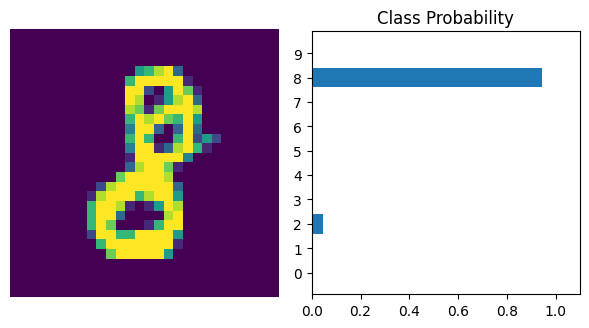

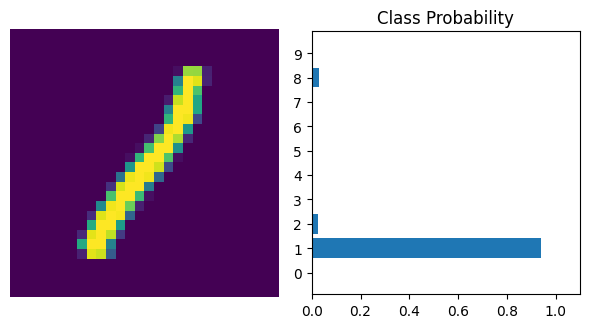

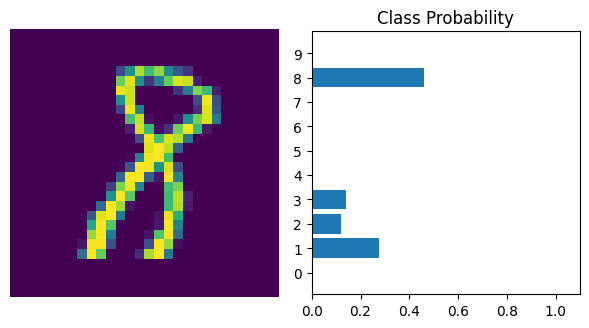

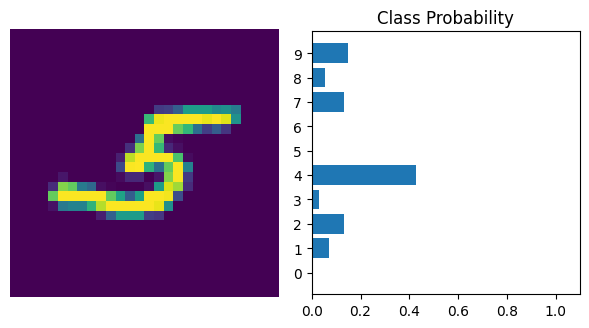

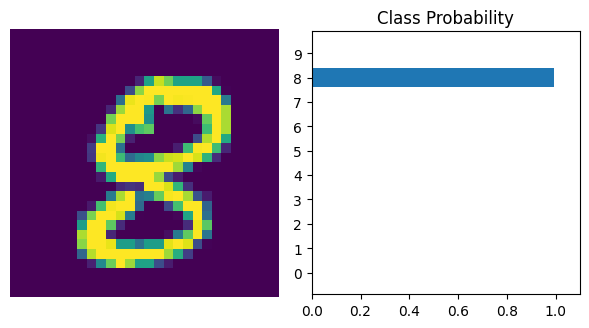

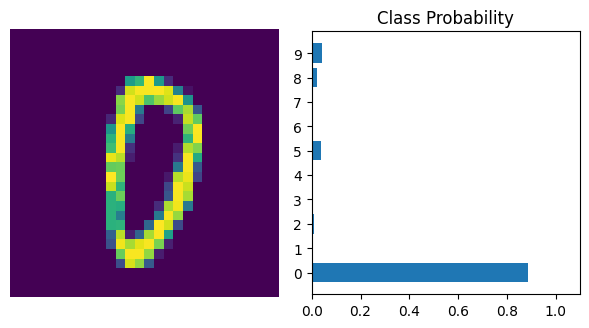

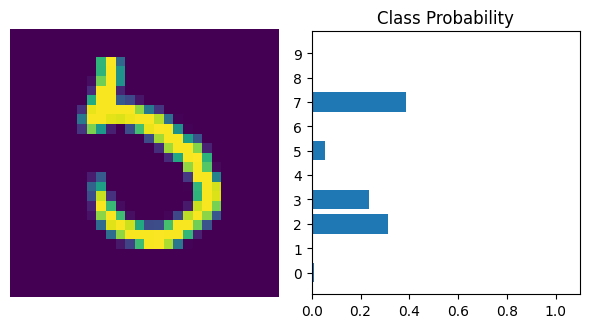

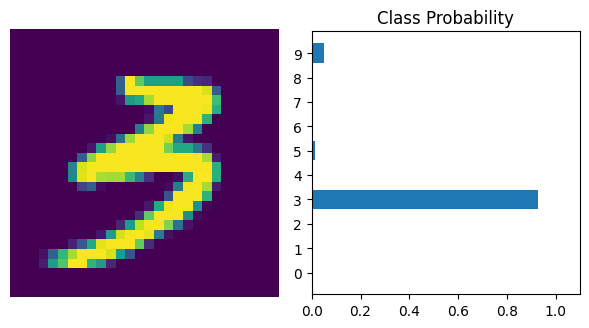

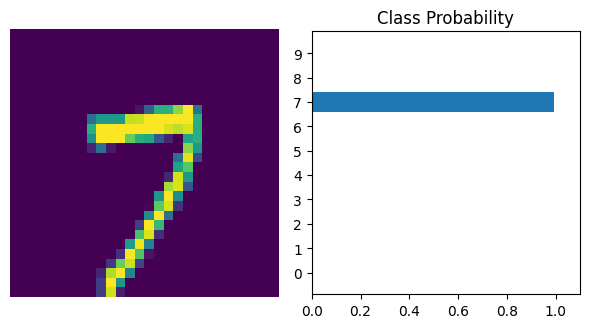

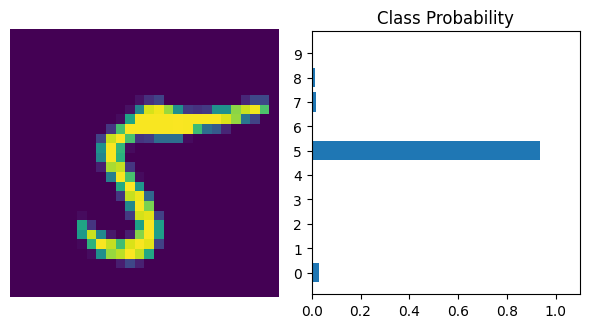

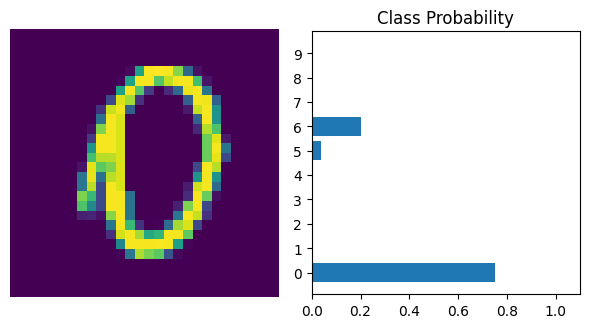

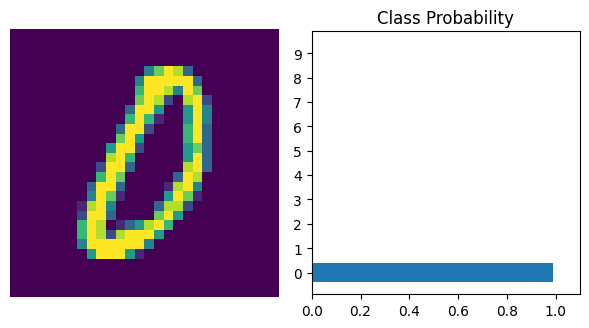

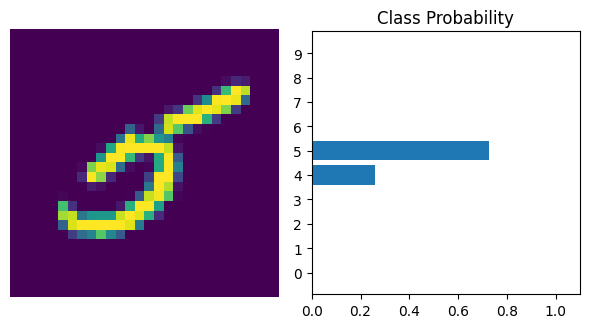

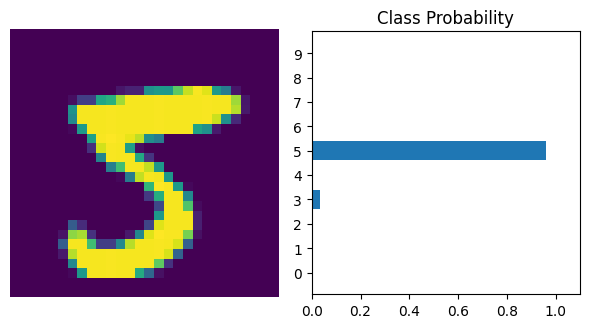

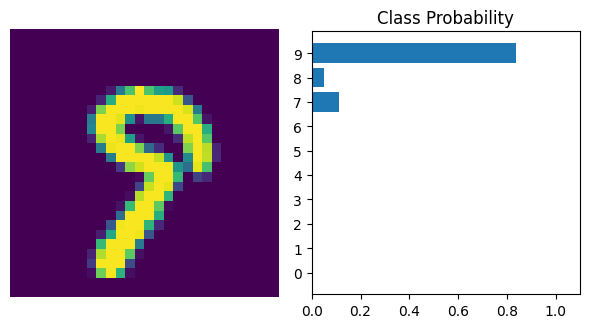

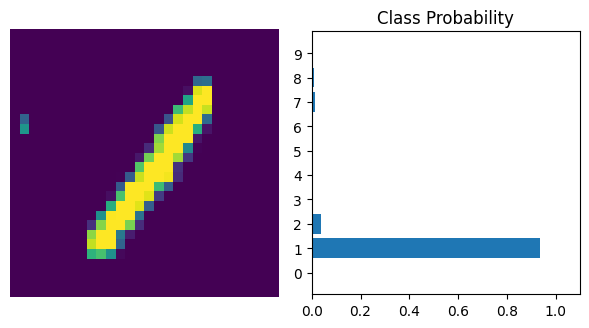

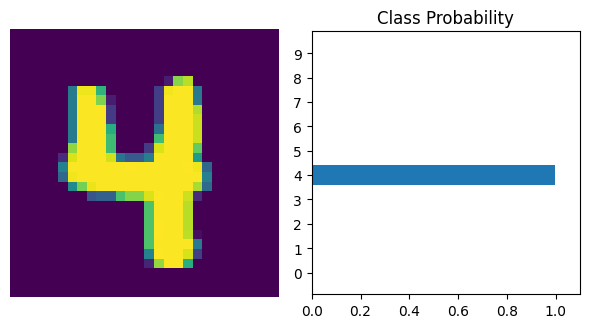

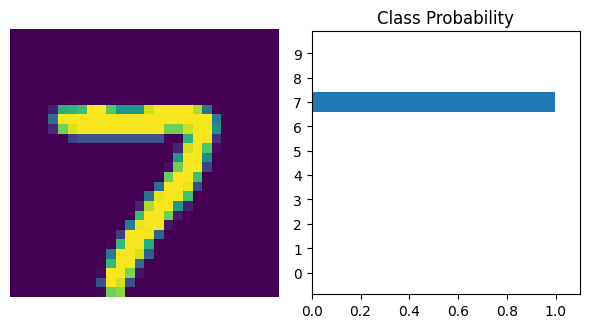

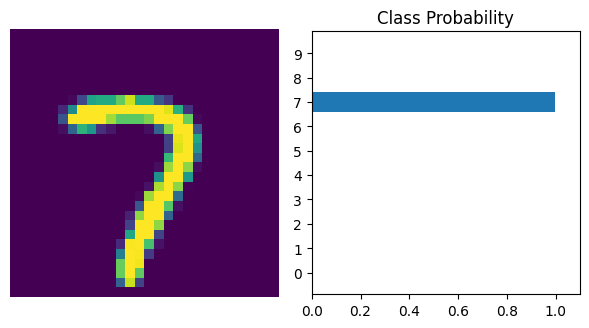

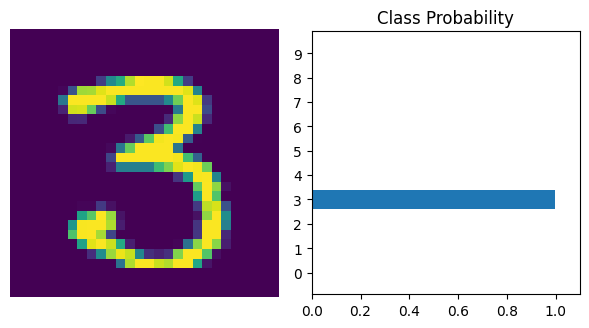

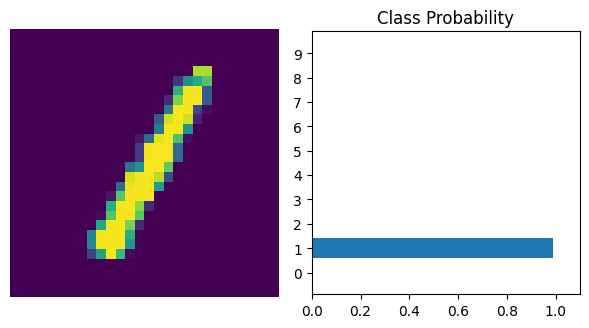

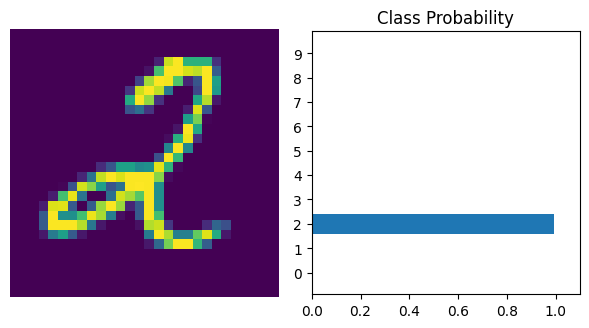

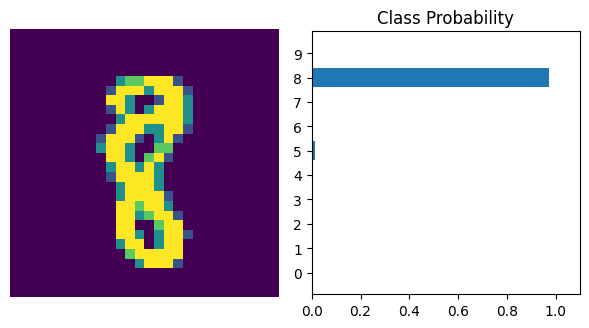

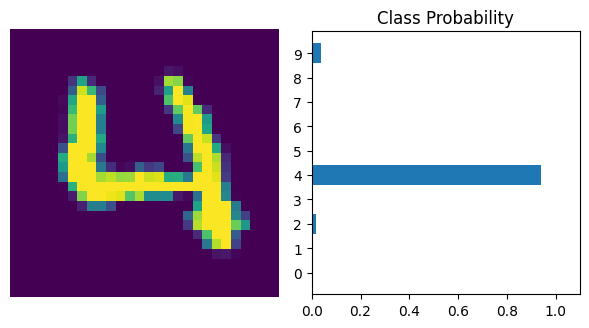

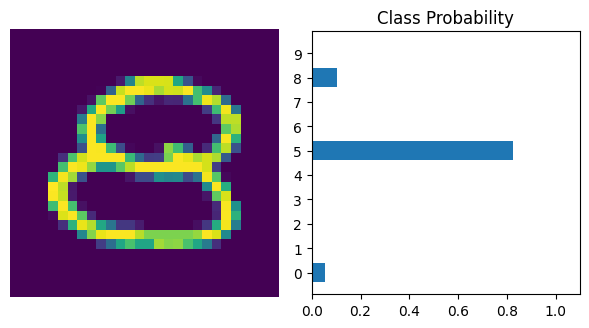

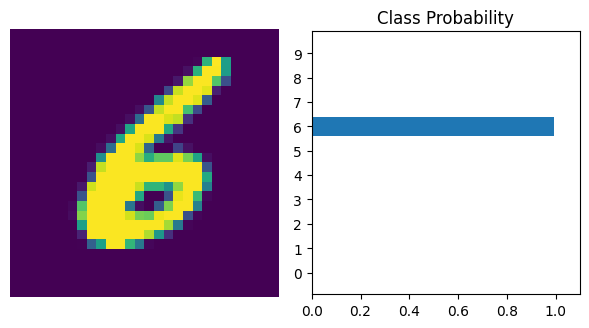

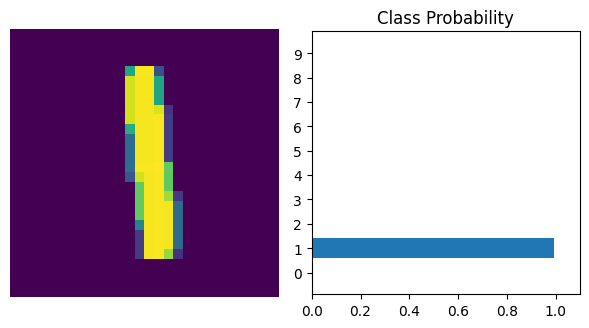

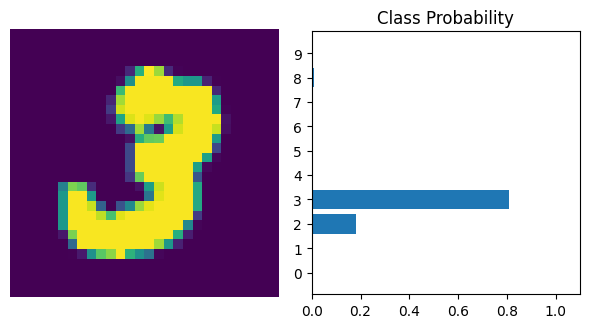

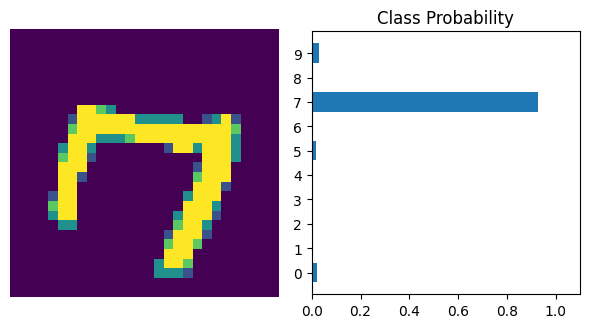

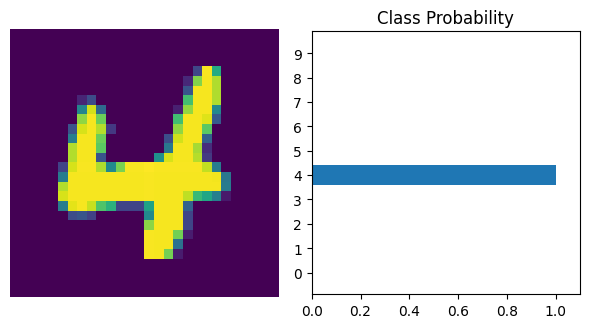

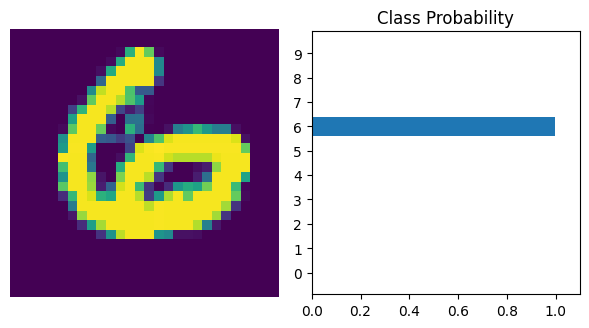

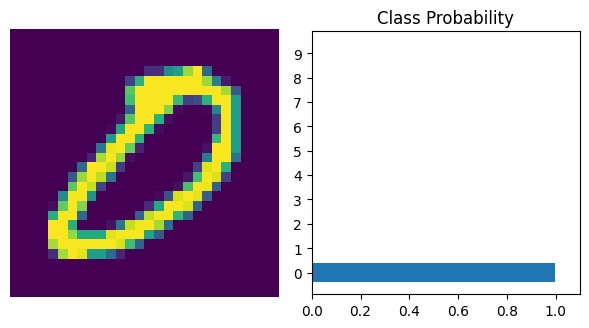

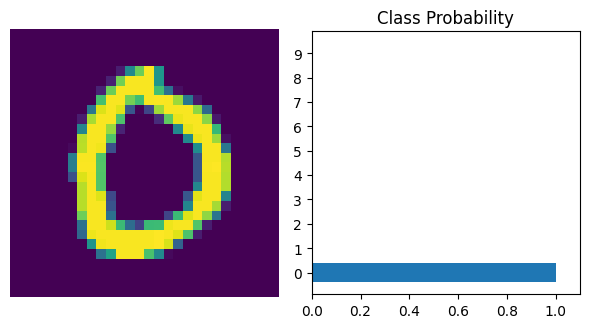

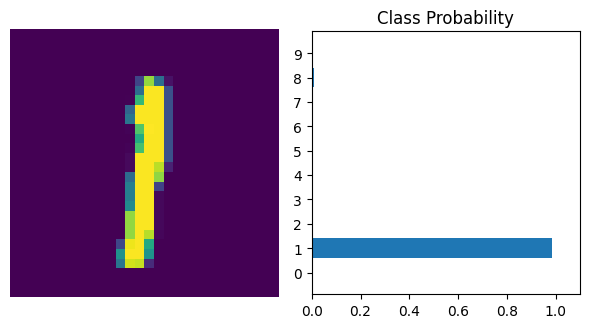

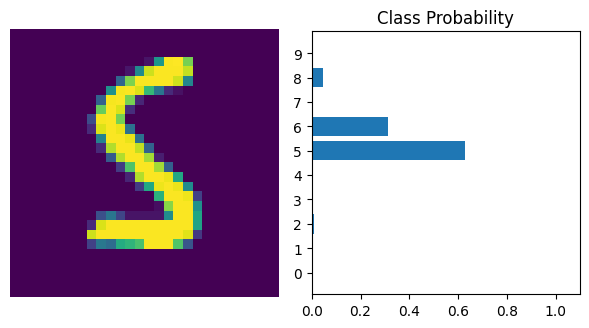

In [21]:
images, labels = next(iter(trainloader))

for img, label in zip(images, labels):
    predict_and_plot(img, model_seq)